In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import requests
import pandas as pd
from datetime import datetime
from io import BytesIO
from datetime import date
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import math


In [2]:
df = pd.read_csv('/content/BTCUSD_Candlestick_15_M_ASK_05.08.2019-29.04.2022 (2).csv')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


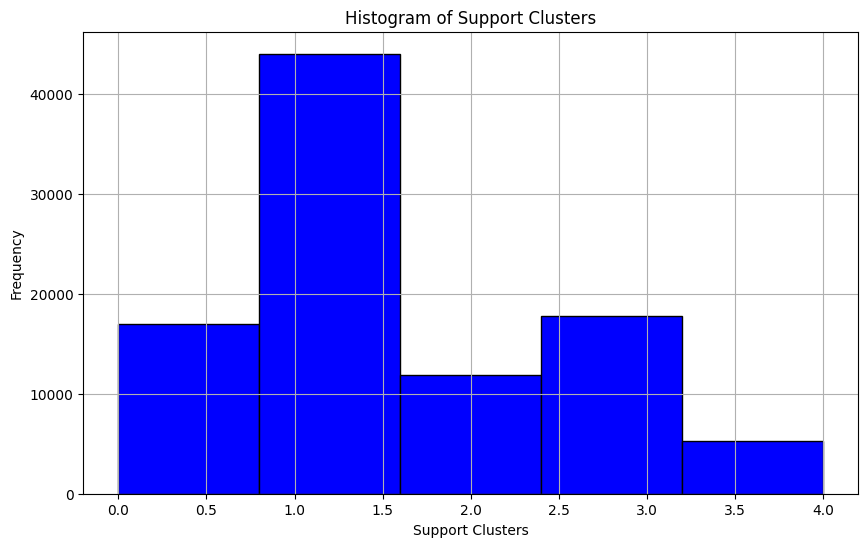

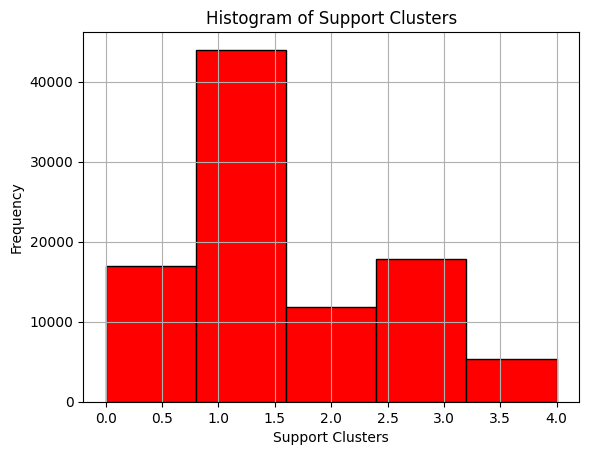

In [3]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming you have the DataFrame named 'df' with the data

# Preprocess the data for 'low' and 'high' features
features_low = df[['Open', 'High', 'Close']]
features_high = df[['Open', 'Low', 'Close']]

# Perform K-Means clustering for 'low' and 'high' features
n_clusters_low = 5  # You can change the number of clusters as per your requirement
n_clusters_high = 5  # You can change the number of clusters as per your requirement

kmeans_low = KMeans(n_clusters=n_clusters_low, random_state=42)
clusters_low = kmeans_low.fit_predict(features_low)

kmeans_high = KMeans(n_clusters=n_clusters_high, random_state=42)
clusters_high = kmeans_high.fit_predict(features_high)

# Add the cluster labels for 'low' and 'high' features to the DataFrame
df['support'] = clusters_low
df['resistance'] = clusters_high



# Plot a histogram using the 'support' feature
plt.figure(figsize=(10, 6))
plt.hist(df['support'], bins=n_clusters_low, color='blue', edgecolor='black')
plt.xlabel('Support Clusters')
plt.ylabel('Frequency')
plt.title('Histogram of Support Clusters')
plt.grid(True)
plt.show()

plt.hist(df['resistance'], bins=n_clusters_high, color='red', edgecolor='black')
plt.xlabel('Support Clusters')
plt.ylabel('Frequency')
plt.title('Histogram of Support Clusters')
plt.grid(True)
plt.show()

In [4]:
df.head()

,Gmt time,Open,High,Low,Close,Volume,support,resistance
0,05.08.2019 00:00:00.000,11037,11104,11037,11087,8.0640,1,1
1,05.08.2019 00:15:00.000,11087,11110,11074,11099,6.9044,1,1
2,05.08.2019 00:30:00.000,11099,11172,11094,11166,7.1441,1,1
3,05.08.2019 00:45:00.000,11166,11288,11166,11273,8.3597,1,1
4,05.08.2019 01:00:00.000,11273,11308,11259,11271,10.4861,1,1


In [5]:
df.tail()

,Gmt time,Open,High,Low,Close,Volume,support,resistance
95899,29.04.2022 22:45:00.000,38608,38693,38604,38676,0.0209,0,0
95900,29.04.2022 23:00:00.000,38674,38708,38640,38703,0.0186,0,0
95901,29.04.2022 23:15:00.000,38703,38720,38618,38641,0.0197,0,0
95902,29.04.2022 23:30:00.000,38641,38729,38629,38710,0.0187,0,0
95903,29.04.2022 23:45:00.000,38710,38725,38627,38658,0.0193,0,0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


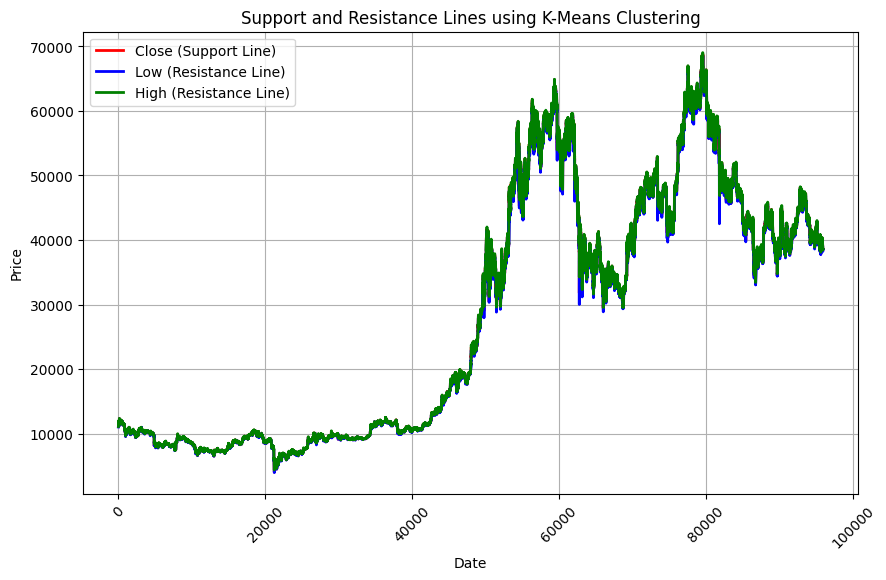

In [6]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming you have the DataFrame named 'df' with the data

# Preprocess the data for 'low' and 'high' features
features_low = df[['Open', 'High', 'Close']]
features_high = df[['Open', 'Low', 'Close']]

# Perform K-Means clustering for 'low' and 'high' features
n_clusters_low = 3  # You can change the number of clusters as per your requirement
n_clusters_high = 3  # You can change the number of clusters as per your requirement

kmeans_low = KMeans(n_clusters=n_clusters_low, random_state=42)
clusters_low = kmeans_low.fit_predict(features_low)

kmeans_high = KMeans(n_clusters=n_clusters_high, random_state=42)
clusters_high = kmeans_high.fit_predict(features_high)





# Plot the lines
plt.figure(figsize=(10, 6))

# Plot 'close' line as support line
plt.plot(df.index, df['Close'], color='red', linestyle='-', linewidth=2, label='Close (Support Line)')

# Plot 'low' line as resistance line
plt.plot(df.index, df['Low'], color='blue', linestyle='-', linewidth=2, label='Low (Resistance Line)')

# Plot 'high' line as resistance line
plt.plot(df.index, df['High'], color='green', linestyle='-', linewidth=2, label='High (Resistance Line)')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Support and Resistance Lines using K-Means Clustering')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [7]:
import pandas as pd

# Assuming you have the DataFrame named 'df' with 'Close' and 'Volume' columns

def vwap(prices, volumes):
    if len(prices) != len(volumes):
        raise ValueError("Number of prices must be equal to the number of volumes")

    total_volume = sum(volumes)

    if total_volume == 0:
        return 0.0  # Handle zero volume case

    cumulative_price_volume = 0.0

    for price, volume in zip(prices, volumes):
        cumulative_price_volume += price * volume

    vwap_value = cumulative_price_volume / total_volume
    return vwap_value

# Calculate VWAP for each row using 'Close' and 'Volume' columns
df['VWAP'] = df.apply(lambda row: vwap([row['Close']], [row['Volume']]), axis=1)

# Print the updated DataFrame with VWAP values
print(df)


                      Gmt time   Open   High    Low  Close   Volume  support  \
0      05.08.2019 00:00:00.000  11037  11104  11037  11087   8.0640        1   
1      05.08.2019 00:15:00.000  11087  11110  11074  11099   6.9044        1   
2      05.08.2019 00:30:00.000  11099  11172  11094  11166   7.1441        1   
3      05.08.2019 00:45:00.000  11166  11288  11166  11273   8.3597        1   
4      05.08.2019 01:00:00.000  11273  11308  11259  11271  10.4861        1   
...                        ...    ...    ...    ...    ...      ...      ...   
95899  29.04.2022 22:45:00.000  38608  38693  38604  38676   0.0209        0   
95900  29.04.2022 23:00:00.000  38674  38708  38640  38703   0.0186        0   
95901  29.04.2022 23:15:00.000  38703  38720  38618  38641   0.0197        0   
95902  29.04.2022 23:30:00.000  38641  38729  38629  38710   0.0187        0   
95903  29.04.2022 23:45:00.000  38710  38725  38627  38658   0.0193        0   

       resistance     VWAP  
0         

In [8]:
import pandas as pd

# Assuming you have a DataFrame named 'df' with the provided data
# You can read the data from a file or create it as a DataFrame

# Convert 'Gmt time' to datetime
df['Gmt time'] = pd.to_datetime(df['Gmt time'])

# Define moving average window sizes
window_5min = 5  # Number of rows for 5 minutes
window_1hr = 60  # Number of rows for 1 hour (assuming 1 row = 1 minute)
window_1day = 24 * 60  # Number of rows for 1 day
window_5days = 5 * 24 * 60  # Number of rows for 5 days

# Calculate Moving Averages
df['MA5min'] = df['Close'].rolling(window=window_5min).mean()
df['MA1hr'] = df['Close'].rolling(window=window_1hr).mean()
df['MA1Day'] = df['Close'].rolling(window=window_1day).mean()
df['MA5days'] = df['Close'].rolling(window=window_5days).mean()

# Print the updated DataFrame with Moving Averages
print(df)


                 Gmt time   Open   High    Low  Close   Volume  support  \
0     2019-05-08 00:00:00  11037  11104  11037  11087   8.0640        1   
1     2019-05-08 00:15:00  11087  11110  11074  11099   6.9044        1   
2     2019-05-08 00:30:00  11099  11172  11094  11166   7.1441        1   
3     2019-05-08 00:45:00  11166  11288  11166  11273   8.3597        1   
4     2019-05-08 01:00:00  11273  11308  11259  11271  10.4861        1   
...                   ...    ...    ...    ...    ...      ...      ...   
95899 2022-04-29 22:45:00  38608  38693  38604  38676   0.0209        0   
95900 2022-04-29 23:00:00  38674  38708  38640  38703   0.0186        0   
95901 2022-04-29 23:15:00  38703  38720  38618  38641   0.0197        0   
95902 2022-04-29 23:30:00  38641  38729  38629  38710   0.0187        0   
95903 2022-04-29 23:45:00  38710  38725  38627  38658   0.0193        0   

       resistance     VWAP   MA5min         MA1hr        MA1Day       MA5days  
0               1  

In [9]:
df

,Gmt time,Open,High,Low,Close,Volume,support,resistance,VWAP,MA5min,MA1hr,MA1Day,MA5days
0,2019-05-08 00:00:00,11037,11104,11037,11087,8.0640,1,1,11087.0,NaN,NaN,NaN,NaN
1,2019-05-08 00:15:00,11087,11110,11074,11099,6.9044,1,1,11099.0,NaN,NaN,NaN,NaN
2,2019-05-08 00:30:00,11099,11172,11094,11166,7.1441,1,1,11166.0,NaN,NaN,NaN,NaN
3,2019-05-08 00:45:00,11166,11288,11166,11273,8.3597,1,1,11273.0,NaN,NaN,NaN,NaN
4,2019-05-08 01:00:00,11273,11308,11259,11271,10.4861,1,1,11271.0,11179.2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95899,2022-04-29 22:45:00,38608,38693,38604,38676,0.0209,0,0,38676.0,38622.8,38876.566667,40097.309028,41498.973056
95900,2022-04-29 23:00:00,38674,38708,38640,38703,0.0186,0,0,38703.0,38638.0,38861.150000,40096.431250,41498.481944
95901,2022-04-29 23:15:00,38703,38720,38618,38641,0.0197,0,0,38641.0,38656.0,38845.600000,40095.514583,41497.975278
95902,2022-04-29 23:30:00,38641,38729,38629,38710,0.0187,0,0,38710.0,38667.6,38832.466667,40094.618750,41497.482500


In [10]:
#RSI

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import numpy as np
from math import floor
from termcolor import colored as cl

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 10)

In [12]:
def get_rsi(close, lookback):
    ret = close.diff()
    up = []
    down = []
    for i in range(len(ret)):
        if ret[i] < 0:
            up.append(0)
            down.append(ret[i])
        else:
            up.append(ret[i])
            down.append(0)
    up_series = pd.Series(up)
    down_series = pd.Series(down).abs()
    up_ewm = up_series.ewm(com = lookback - 1, adjust = False).mean()
    down_ewm = down_series.ewm(com = lookback - 1, adjust = False).mean()
    rs = up_ewm/down_ewm
    rsi = 100 - (100 / (1 + rs))
    rsi_df = pd.DataFrame(rsi).rename(columns = {0:'rsi'}).set_index(close.index)
    rsi_df = rsi_df.dropna()
    return rsi_df[3:]

df['rsi_14'] = get_rsi(df['Close'], 14)
df = df.dropna()
df

,Gmt time,Open,High,Low,Close,Volume,support,resistance,VWAP,MA5min,MA1hr,MA1Day,MA5days,rsi_14
7199,2019-10-18 23:45:00,8004,8004,8004,8004,0.0000,1,1,0.0,8004.0,7990.283333,8274.354167,9780.224028,52.304848
7200,2019-10-19 00:00:00,8004,8004,8004,8004,0.0000,1,1,0.0,8004.0,7991.050000,8274.166667,9779.795833,52.304848
7201,2019-10-19 00:15:00,8004,8004,8004,8004,0.0000,1,1,0.0,8004.0,7991.533333,8274.010417,9779.365972,52.304848
7202,2019-10-19 00:30:00,8004,8004,8004,8004,0.0000,1,1,0.0,8004.0,7992.150000,8273.884722,9778.926806,52.304848
7203,2019-10-19 00:45:00,8004,8004,8004,8004,0.0000,1,1,0.0,8004.0,7992.800000,8273.770139,9778.472778,52.304848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95899,2022-04-29 22:45:00,38608,38693,38604,38676,0.0209,0,0,38676.0,38622.8,38876.566667,40097.309028,41498.973056,50.650124
95900,2022-04-29 23:00:00,38674,38708,38640,38703,0.0186,0,0,38703.0,38638.0,38861.150000,40096.431250,41498.481944,52.190941
95901,2022-04-29 23:15:00,38703,38720,38618,38641,0.0197,0,0,38641.0,38656.0,38845.600000,40095.514583,41497.975278,48.450075
95902,2022-04-29 23:30:00,38641,38729,38629,38710,0.0187,0,0,38710.0,38667.6,38832.466667,40094.618750,41497.482500,52.528151


In [13]:
df.head()

,Gmt time,Open,High,Low,Close,Volume,support,resistance,VWAP,MA5min,MA1hr,MA1Day,MA5days,rsi_14
7199,2019-10-18 23:45:00,8004,8004,8004,8004,0.0,1,1,0.0,8004.0,7990.283333,8274.354167,9780.224028,52.304848
7200,2019-10-19 00:00:00,8004,8004,8004,8004,0.0,1,1,0.0,8004.0,7991.050000,8274.166667,9779.795833,52.304848
7201,2019-10-19 00:15:00,8004,8004,8004,8004,0.0,1,1,0.0,8004.0,7991.533333,8274.010417,9779.365972,52.304848
7202,2019-10-19 00:30:00,8004,8004,8004,8004,0.0,1,1,0.0,8004.0,7992.150000,8273.884722,9778.926806,52.304848
7203,2019-10-19 00:45:00,8004,8004,8004,8004,0.0,1,1,0.0,8004.0,7992.800000,8273.770139,9778.472778,52.304848


In [14]:
df['xy'] = df['Volume'] * df['Close']

<ipython-input-14-726834c5ebea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['xy'] = df['Volume'] * df['Close']


In [15]:
df['X2']=df['Volume']*df['Volume']

<ipython-input-15-0eda19ec276e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['X2']=df['Volume']*df['Volume']


In [16]:
df.tail()

,Gmt time,Open,High,Low,Close,Volume,support,resistance,VWAP,MA5min,MA1hr,MA1Day,MA5days,rsi_14,xy,X2
95899,2022-04-29 22:45:00,38608,38693,38604,38676,0.0209,0,0,38676.0,38622.8,38876.566667,40097.309028,41498.973056,50.650124,808.3284,0.000437
95900,2022-04-29 23:00:00,38674,38708,38640,38703,0.0186,0,0,38703.0,38638.0,38861.150000,40096.431250,41498.481944,52.190941,719.8758,0.000346
95901,2022-04-29 23:15:00,38703,38720,38618,38641,0.0197,0,0,38641.0,38656.0,38845.600000,40095.514583,41497.975278,48.450075,761.2277,0.000388
95902,2022-04-29 23:30:00,38641,38729,38629,38710,0.0187,0,0,38710.0,38667.6,38832.466667,40094.618750,41497.482500,52.528151,723.8770,0.000350
95903,2022-04-29 23:45:00,38710,38725,38627,38658,0.0193,0,0,38658.0,38677.6,38819.166667,40093.684028,41497.000000,49.359071,746.0994,0.000372


In [17]:
tvol = df['Volume'].sum()
tclose =df['Close'].sum()
txy=df['xy'].sum()
tx2=df['X2'].sum()

In [18]:
slope=(20*txy-tvol*tclose)/(20*tx2-pow(tvol,2))
intercept=(tclose-tx2*tvol)/20
print(slope)
print(intercept)

2539.75594115125
-60479850817699.04


In [19]:
df['trend']=slope*df['Volume']+intercept

<ipython-input-19-cc00eef92145>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trend']=slope*df['Volume']+intercept


In [20]:
df['s'] = (slope * df['Volume'] - 1 * df['Close'] + intercept) / math.sqrt(math.pow(slope, 2) + math.pow(-1, 2))

<ipython-input-20-ac80be112bb7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['s'] = (slope * df['Volume'] - 1 * df['Close'] + intercept) / math.sqrt(math.pow(slope, 2) + math.pow(-1, 2))


In [21]:
df['isSupportCandidate'] = ((df['s'] > df['s'].shift(1)) & (df['s'] > df['s'].shift(-1))).astype(int)
df.tail()

<ipython-input-21-8f3d631cd34a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['isSupportCandidate'] = ((df['s'] > df['s'].shift(1)) & (df['s'] > df['s'].shift(-1))).astype(int)


,Gmt time,Open,High,Low,Close,Volume,support,resistance,VWAP,MA5min,MA1hr,MA1Day,MA5days,rsi_14,xy,X2,trend,s,isSupportCandidate
95899,2022-04-29 22:45:00,38608,38693,38604,38676,0.0209,0,0,38676.0,38622.8,38876.566667,40097.309028,41498.973056,50.650124,808.3284,0.000437,-6.047985e+13,-2.381325e+10,0
95900,2022-04-29 23:00:00,38674,38708,38640,38703,0.0186,0,0,38703.0,38638.0,38861.150000,40096.431250,41498.481944,52.190941,719.8758,0.000346,-6.047985e+13,-2.381325e+10,0
95901,2022-04-29 23:15:00,38703,38720,38618,38641,0.0197,0,0,38641.0,38656.0,38845.600000,40095.514583,41497.975278,48.450075,761.2277,0.000388,-6.047985e+13,-2.381325e+10,1
95902,2022-04-29 23:30:00,38641,38729,38629,38710,0.0187,0,0,38710.0,38667.6,38832.466667,40094.618750,41497.482500,52.528151,723.8770,0.000350,-6.047985e+13,-2.381325e+10,0
95903,2022-04-29 23:45:00,38710,38725,38627,38658,0.0193,0,0,38658.0,38677.6,38819.166667,40093.684028,41497.000000,49.359071,746.0994,0.000372,-6.047985e+13,-2.381325e+10,0


In [22]:
df['isResistance'] = ((df['s'] < df['s'].shift(1)) & (df['s'] < df['s'].shift(-1))).astype(int)
df.tail()

<ipython-input-22-94af6fe1a254>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['isResistance'] = ((df['s'] < df['s'].shift(1)) & (df['s'] < df['s'].shift(-1))).astype(int)


,Gmt time,Open,High,Low,Close,Volume,support,resistance,VWAP,MA5min,MA1hr,MA1Day,MA5days,rsi_14,xy,X2,trend,s,isSupportCandidate,isResistance
95899,2022-04-29 22:45:00,38608,38693,38604,38676,0.0209,0,0,38676.0,38622.8,38876.566667,40097.309028,41498.973056,50.650124,808.3284,0.000437,-6.047985e+13,-2.381325e+10,0,0
95900,2022-04-29 23:00:00,38674,38708,38640,38703,0.0186,0,0,38703.0,38638.0,38861.150000,40096.431250,41498.481944,52.190941,719.8758,0.000346,-6.047985e+13,-2.381325e+10,0,1
95901,2022-04-29 23:15:00,38703,38720,38618,38641,0.0197,0,0,38641.0,38656.0,38845.600000,40095.514583,41497.975278,48.450075,761.2277,0.000388,-6.047985e+13,-2.381325e+10,1,0
95902,2022-04-29 23:30:00,38641,38729,38629,38710,0.0187,0,0,38710.0,38667.6,38832.466667,40094.618750,41497.482500,52.528151,723.8770,0.000350,-6.047985e+13,-2.381325e+10,0,1
95903,2022-04-29 23:45:00,38710,38725,38627,38658,0.0193,0,0,38658.0,38677.6,38819.166667,40093.684028,41497.000000,49.359071,746.0994,0.000372,-6.047985e+13,-2.381325e+10,0,0


In [23]:
#support line

In [24]:
fdata = df[df['isSupportCandidate'] == 1]
fdata.reset_index(drop=True, inplace=True)
fdata.head()

,Gmt time,Open,High,Low,Close,Volume,support,resistance,VWAP,MA5min,MA1hr,MA1Day,MA5days,rsi_14,xy,X2,trend,s,isSupportCandidate,isResistance
0,2019-10-20 21:15:00,8276,8299,8273,8296,0.0306,1,1,8296.0,8126.6,8028.883333,8249.235417,9684.692083,99.999982,253.8576,0.000936,-6.047985e+13,-2.381325e+10,1,0
1,2019-10-20 22:15:00,8292,8298,8280,8282,6.3524,1,1,8282.0,8283.8,8046.266667,8249.393056,9682.957083,86.830265,52610.5768,40.352986,-6.047985e+13,-2.381325e+10,1,0
2,2019-10-20 22:45:00,8275,8277,8262,8270,9.7794,1,1,8270.0,8277.6,8054.683333,8249.460417,9682.104861,82.351313,80875.6380,95.636664,-6.047985e+13,-2.381325e+10,1,0
3,2019-10-20 23:15:00,8262,8262,8245,8255,5.4328,1,1,8255.0,8268.8,8062.633333,8249.508333,9681.225833,76.601700,44847.7640,29.515316,-6.047985e+13,-2.381325e+10,1,0
4,2019-10-21 00:15:00,8295,8295,8279,8279,7.1317,1,1,8279.0,8277.8,8080.200000,8249.697222,9679.439583,74.476329,59043.3443,50.861145,-6.047985e+13,-2.381325e+10,1,0


In [25]:
rows=fdata.shape[0]
rows
hrows=rows/2
hrows

10748.0

In [26]:
fdata['Dsupport'] = (fdata['Volume'][10748] * fdata['Close'] - 1 * fdata['xy'] + fdata['Volume'][10749]) / math.sqrt(math.pow(fdata['Volume'][10748], 2) + math.pow(-1, 2))
fdata.head()

<ipython-input-26-b878013faf31>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fdata['Dsupport'] = (fdata['Volume'][10748] * fdata['Close'] - 1 * fdata['xy'] + fdata['Volume'][10749]) / math.sqrt(math.pow(fdata['Volume'][10748], 2) + math.pow(-1, 2))


,Gmt time,Open,High,Low,Close,Volume,support,resistance,VWAP,MA5min,...,MA1Day,MA5days,rsi_14,xy,X2,trend,s,isSupportCandidate,isResistance,Dsupport
0,2019-10-20 21:15:00,8276,8299,8273,8296,0.0306,1,1,8296.0,8126.6,...,8249.235417,9684.692083,99.999982,253.8576,0.000936,-6.047985e+13,-2.381325e+10,1,0,-135.193578
1,2019-10-20 22:15:00,8292,8298,8280,8282,6.3524,1,1,8282.0,8283.8,...,8249.393056,9682.957083,86.830265,52610.5768,40.352986,-6.047985e+13,-2.381325e+10,1,0,-52486.760565
2,2019-10-20 22:45:00,8275,8277,8262,8270,9.7794,1,1,8270.0,8277.6,...,8249.460417,9682.104861,82.351313,80875.6380,95.636664,-6.047985e+13,-2.381325e+10,1,0,-80749.103830
3,2019-10-20 23:15:00,8262,8262,8245,8255,5.4328,1,1,8255.0,8268.8,...,8249.508333,9681.225833,76.601700,44847.7640,29.515316,-6.047985e+13,-2.381325e+10,1,0,-44725.127413
4,2019-10-21 00:15:00,8295,8295,8279,8279,7.1317,1,1,8279.0,8277.8,...,8249.697222,9679.439583,74.476329,59043.3443,50.861145,-6.047985e+13,-2.381325e+10,1,0,-58918.913344


In [27]:
frdata = df[df['isResistance'] == 1]
frdata.reset_index(drop=True, inplace=True)
frdata.head()

,Gmt time,Open,High,Low,Close,Volume,support,resistance,VWAP,MA5min,MA1hr,MA1Day,MA5days,rsi_14,xy,X2,trend,s,isSupportCandidate,isResistance
0,2019-10-20 21:00:00,8282,8282,8259,8277,0.0199,1,1,8277.0,8071.4,8024.283333,8249.185417,9685.129583,99.999981,164.7123,0.000396,-6.047985e+13,-2.381325e+10,0,1
1,2019-10-20 21:45:00,8279,8282,8268,8269,0.0117,1,1,8269.0,8228.4,8037.366667,8249.305556,9683.821667,89.575138,96.7473,0.000137,-6.047985e+13,-2.381325e+10,0,1
2,2019-10-20 22:30:00,8282,8285,8275,8275,4.2690,1,1,8275.0,8279.6,8050.516667,8249.428472,9682.534167,84.240604,35325.9750,18.224361,-6.047985e+13,-2.381325e+10,0,1
3,2019-10-20 23:00:00,8267,8270,8261,8262,2.5296,1,1,8262.0,8276.2,8058.716667,8249.486806,9681.668611,79.287332,20899.5552,6.398876,-6.047985e+13,-2.381325e+10,0,1
4,2019-10-20 23:45:00,8269,8291,8269,8291,1.0340,1,1,8291.0,8269.4,8071.300000,8249.586111,9680.331389,80.443045,8572.8940,1.069156,-6.047985e+13,-2.381325e+10,0,1


In [28]:
frdata['Dresistance'] = (fdata['Volume'][frdata.shape[0]/2] * fdata['Close'] - 1 * fdata['xy'] + fdata['Volume'][frdata.shape[0]/2+1]) / math.sqrt(math.pow(fdata['Volume'][frdata.shape[0]/2], 2) + math.pow(-1, 2))
fdata.head()

<ipython-input-28-f67268041479>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frdata['Dresistance'] = (fdata['Volume'][frdata.shape[0]/2] * fdata['Close'] - 1 * fdata['xy'] + fdata['Volume'][frdata.shape[0]/2+1]) / math.sqrt(math.pow(fdata['Volume'][frdata.shape[0]/2], 2) + math.pow(-1, 2))


,Gmt time,Open,High,Low,Close,Volume,support,resistance,VWAP,MA5min,...,MA1Day,MA5days,rsi_14,xy,X2,trend,s,isSupportCandidate,isResistance,Dsupport
0,2019-10-20 21:15:00,8276,8299,8273,8296,0.0306,1,1,8296.0,8126.6,...,8249.235417,9684.692083,99.999982,253.8576,0.000936,-6.047985e+13,-2.381325e+10,1,0,-135.193578
1,2019-10-20 22:15:00,8292,8298,8280,8282,6.3524,1,1,8282.0,8283.8,...,8249.393056,9682.957083,86.830265,52610.5768,40.352986,-6.047985e+13,-2.381325e+10,1,0,-52486.760565
2,2019-10-20 22:45:00,8275,8277,8262,8270,9.7794,1,1,8270.0,8277.6,...,8249.460417,9682.104861,82.351313,80875.6380,95.636664,-6.047985e+13,-2.381325e+10,1,0,-80749.103830
3,2019-10-20 23:15:00,8262,8262,8245,8255,5.4328,1,1,8255.0,8268.8,...,8249.508333,9681.225833,76.601700,44847.7640,29.515316,-6.047985e+13,-2.381325e+10,1,0,-44725.127413
4,2019-10-21 00:15:00,8295,8295,8279,8279,7.1317,1,1,8279.0,8277.8,...,8249.697222,9679.439583,74.476329,59043.3443,50.861145,-6.047985e+13,-2.381325e+10,1,0,-58918.913344


In [ ]:
#slope datasssssss

In [53]:
# Initialize a list to store the sums and corresponding chunk indices
sums = []
chunk_indices = []

# Calculate the sum of the 'Volume' column for each chunk with at least one positive value
for i in range(0, len(fdata), 20):
    chunk = fdata.iloc[i:i + 20]  # Get a chunk of 20 rows
    if (chunk['Volume'] > 0).any():
        chunk_sum = chunk['Volume'].sum()
        sums.append(chunk_sum)
        chunk_indices.append(i // 20 + 1)  # Calculate the chunk index

# Create a new DataFrame with the sums and chunk indices
fdatum = pd.DataFrame({'Volume Sum': sums})

# Print the new DataFrame
fdatum.tail()

,Volume Sum
1070,0.1884
1071,0.2209
1072,0.1775
1073,0.2329
1074,0.2321


In [54]:
# Initialize a list to store the sums and corresponding chunk indices
sums = []
chunk_indices = []

# Calculate the sum of the 'Volume' column for each chunk with at least one positive value
for i in range(0, len(fdata), 20):
    chunk = fdata.iloc[i:i + 20]  # Get a chunk of 20 rows
    if (chunk['Close'] > 0).any():
        chunk_sum = chunk['Close'].sum()
        sums.append(chunk_sum)
        chunk_indices.append(i // 20 + 1)  # Calculate the chunk index

# Create a new DataFrame with the sums and chunk indices
fdatum['Close sum'] = pd.DataFrame({'Close Sum': sums})

# Print the new DataFrame
fdatum.tail()

,Volume Sum,Close sum
1070,0.1884,798930
1071,0.2209,770189
1072,0.1775,786332
1073,0.2329,793866
1074,0.2321,620000


In [55]:
# Initialize a list to store the sums and corresponding chunk indices
sums = []
chunk_indices = []

# Calculate the sum of the 'Volume' column for each chunk with at least one positive value
for i in range(0, len(fdata), 20):
    chunk = fdata.iloc[i:i + 20]  # Get a chunk of 20 rows
    if (chunk['xy'] > 0).any():
        chunk_sum = chunk['xy'].sum()
        sums.append(chunk_sum)
        chunk_indices.append(i // 20 + 1)  # Calculate the chunk index

# Create a new DataFrame with the sums and chunk indices
fdatum['XY sums'] = pd.DataFrame({'XY Sum': sums})

# Print the new DataFrame
fdatum.tail()

,Volume Sum,Close sum,XY sums
1070,0.1884,798930,7437.7080
1071,0.2209,770189,8494.3253
1072,0.1775,786332,6967.6743
1073,0.2329,793866,9248.5765
1074,0.2321,620000,8990.4734


In [56]:
# Initialize a list to store the sums and corresponding chunk indices
sums = []
chunk_indices = []

# Calculate the sum of the 'Volume' column for each chunk with at least one positive value
for i in range(0, len(fdata), 20):
    chunk = fdata.iloc[i:i + 20]  # Get a chunk of 20 rows
    if (chunk['X2'] > 0).any():
        chunk_sum = chunk['X2'].sum()
        sums.append(chunk_sum)
        chunk_indices.append(i // 20 + 1)  # Calculate the chunk index

# Create a new DataFrame with the sums and chunk indices
fdatum['x2 sums'] = pd.DataFrame({'x2 Sum': sums})

# Print the new DataFrame
fdatum.tail()

,Volume Sum,Close sum,XY sums,x2 sums
1070,0.1884,798930,7437.7080,0.002342
1071,0.2209,770189,8494.3253,0.002921
1072,0.1775,786332,6967.6743,0.001879
1073,0.2329,793866,9248.5765,0.003228
1074,0.2321,620000,8990.4734,0.003614


In [57]:
# Initialize a list to store the counts of positive numbers and corresponding chunk indices
positive_counts = []
chunk_indices = []

# Calculate the count of positive numbers in the 'Volume' column for each chunk
for i in range(0, len(fdata), 20):
    chunk = fdata.iloc[i:i + 20]  # Get a chunk of 20 rows
    positive_count = (chunk['Volume'] > 0).sum()
    positive_counts.append(positive_count)
    chunk_indices.append(i // 20 + 1)  # Calculate the chunk index

# Create a new DataFrame with the counts and chunk indices
fdatum['tpositive'] = pd.DataFrame({'Positive Count': positive_counts})

# Print the new DataFrame
fdatum.tail()







,Volume Sum,Close sum,XY sums,x2 sums,tpositive
1070,0.1884,798930,7437.7080,0.002342,20
1071,0.2209,770189,8494.3253,0.002921,20
1072,0.1775,786332,6967.6743,0.001879,20
1073,0.2329,793866,9248.5765,0.003228,20
1074,0.2321,620000,8990.4734,0.003614,16


In [59]:
fdatum['support1']=(fdatum['tpositive']*fdatum['XY sums']-fdatum['Volume Sum']*fdatum['Close sum'])/(fdatum['tpositive']*fdatum['x2 sums']-pow(fdatum['Volume Sum'],2))
fdatum.head()

,Volume Sum,Close sum,XY sums,x2 sums,tpositive,support1
0,124.8644,165699,1.034508e+06,861.854582,20,0.157829
1,143.8103,165189,1.187768e+06,1110.556402,20,-0.334932
2,165.2551,165544,1.367332e+06,1441.280216,20,-6.822380
3,166.7013,160192,1.319382e+06,1993.219688,20,-26.216708
4,192.0730,150219,1.442494e+06,2068.875240,20,-0.699857


In [60]:
fdatum['support2']=(fdatum['Close sum']-fdatum['support1']*fdatum['Volume Sum'])/fdatum['tpositive']
fdatum.head()

,Volume Sum,Close sum,XY sums,x2 sums,tpositive,support1,support2
0,124.8644,165699,1.034508e+06,861.854582,20,0.157829,8283.964639
1,143.8103,165189,1.187768e+06,1110.556402,20,-0.334932,8261.858337
2,165.2551,165544,1.367332e+06,1441.280216,20,-6.822380,8333.571654
3,166.7013,160192,1.319382e+06,1993.219688,20,-26.216708,8228.117963
4,192.0730,150219,1.442494e+06,2068.875240,20,-0.699857,7517.671180


In [61]:
#now find resistance linessssssssssss

In [62]:
# Initialize a list to store the sums and corresponding chunk indices
sums = []
chunk_indices = []

# Calculate the sum of the 'Volume' column for each chunk with at least one positive value
for i in range(0, len(frdata), 20):
    chunk = frdata.iloc[i:i + 20]  # Get a chunk of 20 rows
    if (chunk['Volume'] > 0).any():
        chunk_sum = chunk['Volume'].sum()
        sums.append(chunk_sum)
        chunk_indices.append(i // 20 + 1)  # Calculate the chunk index

# Create a new DataFrame with the sums and chunk indices
frdatum = pd.DataFrame({'Volume Sum': sums})

# Print the new DataFrame
frdatum.tail()

,Volume Sum
1068,0.1401
1069,0.2017
1070,0.1999
1071,0.2267
1072,0.2416


In [63]:
# Initialize a list to store the sums and corresponding chunk indices
sums = []
chunk_indices = []

# Calculate the sum of the 'Volume' column for each chunk with at least one positive value
for i in range(0, len(frdata), 20):
    chunk = frdata.iloc[i:i + 20]  # Get a chunk of 20 rows
    if (chunk['Close'] > 0).any():
        chunk_sum = chunk['Close'].sum()
        sums.append(chunk_sum)
        chunk_indices.append(i // 20 + 1)  # Calculate the chunk index

# Create a new DataFrame with the sums and chunk indices
frdatum['Close sum'] = pd.DataFrame({'Close Sum': sums})

# Print the new DataFrame
frdatum.tail()

,Volume Sum,Close sum
1068,0.1401,808290
1069,0.2017,771641
1070,0.1999,786812
1071,0.2267,798783
1072,0.2416,780080


In [64]:
# Initialize a list to store the sums and corresponding chunk indices
sums = []
chunk_indices = []

# Calculate the sum of the 'Volume' column for each chunk with at least one positive value
for i in range(0, len(frdata), 20):
    chunk = frdata.iloc[i:i + 20]  # Get a chunk of 20 rows
    if (chunk['xy'] > 0).any():
        chunk_sum = chunk['xy'].sum()
        sums.append(chunk_sum)
        chunk_indices.append(i // 20 + 1)  # Calculate the chunk index

# Create a new DataFrame with the sums and chunk indices
frdatum['XY sums'] = pd.DataFrame({'XY Sum': sums})

# Print the new DataFrame
frdatum.tail()

,Volume Sum,Close sum,XY sums
1068,0.1401,808290,5635.6388
1069,0.2017,771641,7786.6594
1070,0.1999,786812,7857.3591
1071,0.2267,798783,9066.2562
1072,0.2416,780080,9398.4239


In [65]:
# Initialize a list to store the sums and corresponding chunk indices
sums = []
chunk_indices = []

# Calculate the sum of the 'Volume' column for each chunk with at least one positive value
for i in range(0, len(frdata), 20):
    chunk = frdata.iloc[i:i + 20]  # Get a chunk of 20 rows
    if (chunk['X2'] > 0).any():
        chunk_sum = chunk['X2'].sum()
        sums.append(chunk_sum)
        chunk_indices.append(i // 20 + 1)  # Calculate the chunk index

# Create a new DataFrame with the sums and chunk indices
frdatum['x2 sums'] = pd.DataFrame({'x2 Sum': sums})

# Print the new DataFrame
frdatum.tail()

,Volume Sum,Close sum,XY sums,x2 sums
1068,0.1401,808290,5635.6388,0.001220
1069,0.2017,771641,7786.6594,0.002363
1070,0.1999,786812,7857.3591,0.002293
1071,0.2267,798783,9066.2562,0.003180
1072,0.2416,780080,9398.4239,0.003451


In [66]:
# Initialize a list to store the counts of positive numbers and corresponding chunk indices
positive_counts = []
chunk_indices = []

# Calculate the count of positive numbers in the 'Volume' column for each chunk
for i in range(0, len(frdata), 20):
    chunk = frdata.iloc[i:i + 20]  # Get a chunk of 20 rows
    positive_count = (chunk['Volume'] > 0).sum()
    positive_counts.append(positive_count)
    chunk_indices.append(i // 20 + 1)  # Calculate the chunk index

# Create a new DataFrame with the counts and chunk indices
frdatum['tpositive'] = pd.DataFrame({'Positive Count': positive_counts})

# Print the new DataFrame
frdatum.tail()

,Volume Sum,Close sum,XY sums,x2 sums,tpositive
1068,0.1401,808290,5635.6388,0.001220,20
1069,0.2017,771641,7786.6594,0.002363,20
1070,0.1999,786812,7857.3591,0.002293,20
1071,0.2267,798783,9066.2562,0.003180,20
1072,0.2416,780080,9398.4239,0.003451,20


In [67]:
frdatum['support1']=(frdatum['tpositive']*frdatum['XY sums']-frdatum['Volume Sum']*frdatum['Close sum'])/(frdatum['tpositive']*frdatum['x2 sums']-pow(frdatum['Volume Sum'],2))
frdatum.head()

,Volume Sum,Close sum,XY sums,x2 sums,tpositive,support1
0,49.3221,165790,409023.6834,177.420654,20,3.013873
1,69.9401,165346,578207.4715,275.409102,20,-0.269793
2,81.2574,165765,672953.0234,399.058769,20,-7.670026
3,80.2218,160886,637730.7755,602.907709,20,-27.024605
4,109.2811,150337,820922.3223,757.494892,20,-3.287968


In [68]:
frdatum['support2']=(frdatum['Close sum']-frdatum['support1']*frdatum['Volume Sum'])/frdatum['tpositive']
frdatum.head()

,Volume Sum,Close sum,XY sums,x2 sums,tpositive,support1,support2
0,49.3221,165790,409023.6834,177.420654,20,3.013873,8282.067473
1,69.9401,165346,578207.4715,275.409102,20,-0.269793,8268.243466
2,81.2574,165765,672953.0234,399.058769,20,-7.670026,8319.412318
3,80.2218,160886,637730.7755,602.907709,20,-27.024605,8152.698124
4,109.2811,150337,820922.3223,757.494892,20,-3.287968,7534.815636


In [69]:
fdatum.head()

,Volume Sum,Close sum,XY sums,x2 sums,tpositive,support1,support2
0,124.8644,165699,1.034508e+06,861.854582,20,0.157829,8283.964639
1,143.8103,165189,1.187768e+06,1110.556402,20,-0.334932,8261.858337
2,165.2551,165544,1.367332e+06,1441.280216,20,-6.822380,8333.571654
3,166.7013,160192,1.319382e+06,1993.219688,20,-26.216708,8228.117963
4,192.0730,150219,1.442494e+06,2068.875240,20,-0.699857,7517.671180


In [70]:
frdatum.head()

,Volume Sum,Close sum,XY sums,x2 sums,tpositive,support1,support2
0,49.3221,165790,409023.6834,177.420654,20,3.013873,8282.067473
1,69.9401,165346,578207.4715,275.409102,20,-0.269793,8268.243466
2,81.2574,165765,672953.0234,399.058769,20,-7.670026,8319.412318
3,80.2218,160886,637730.7755,602.907709,20,-27.024605,8152.698124
4,109.2811,150337,820922.3223,757.494892,20,-3.287968,7534.815636


In [73]:
df.head()

,Gmt time,Open,High,Low,Close,Volume,support,resistance,VWAP,MA5min,MA1hr,MA1Day,MA5days,rsi_14,xy,X2,trend,s,isSupportCandidate,isResistance
7199,2019-10-18 23:45:00,8004,8004,8004,8004,0.0,1,1,0.0,8004.0,7990.283333,8274.354167,9780.224028,52.304848,0.0,0.0,-6.047985e+13,-2.381325e+10,0,0
7200,2019-10-19 00:00:00,8004,8004,8004,8004,0.0,1,1,0.0,8004.0,7991.050000,8274.166667,9779.795833,52.304848,0.0,0.0,-6.047985e+13,-2.381325e+10,0,0
7201,2019-10-19 00:15:00,8004,8004,8004,8004,0.0,1,1,0.0,8004.0,7991.533333,8274.010417,9779.365972,52.304848,0.0,0.0,-6.047985e+13,-2.381325e+10,0,0
7202,2019-10-19 00:30:00,8004,8004,8004,8004,0.0,1,1,0.0,8004.0,7992.150000,8273.884722,9778.926806,52.304848,0.0,0.0,-6.047985e+13,-2.381325e+10,0,0
7203,2019-10-19 00:45:00,8004,8004,8004,8004,0.0,1,1,0.0,8004.0,7992.800000,8273.770139,9778.472778,52.304848,0.0,0.0,-6.047985e+13,-2.381325e+10,0,0


In [74]:
df['supportline']=fdatum['support1']*df['Volume']+fdatum['support2']

<ipython-input-74-541261adf5e0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['supportline']=fdatum['support1']*df['Volume']+fdatum['support2']


In [75]:
df['resistanceline']=frdatum['support1']*df['Volume']+frdatum['support2']

<ipython-input-75-deb3557f4515>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['resistanceline']=frdatum['support1']*df['Volume']+frdatum['support2']


In [77]:
df.head()

,Gmt time,Open,High,Low,Close,Volume,support,resistance,VWAP,MA5min,...,MA5days,rsi_14,xy,X2,trend,s,isSupportCandidate,isResistance,supportline,resistanceline
7199,2019-10-18 23:45:00,8004,8004,8004,8004,0.0,1,1,0.0,8004.0,...,9780.224028,52.304848,0.0,0.0,-6.047985e+13,-2.381325e+10,0,0,NaN,NaN
7200,2019-10-19 00:00:00,8004,8004,8004,8004,0.0,1,1,0.0,8004.0,...,9779.795833,52.304848,0.0,0.0,-6.047985e+13,-2.381325e+10,0,0,NaN,NaN
7201,2019-10-19 00:15:00,8004,8004,8004,8004,0.0,1,1,0.0,8004.0,...,9779.365972,52.304848,0.0,0.0,-6.047985e+13,-2.381325e+10,0,0,NaN,NaN
7202,2019-10-19 00:30:00,8004,8004,8004,8004,0.0,1,1,0.0,8004.0,...,9778.926806,52.304848,0.0,0.0,-6.047985e+13,-2.381325e+10,0,0,NaN,NaN
7203,2019-10-19 00:45:00,8004,8004,8004,8004,0.0,1,1,0.0,8004.0,...,9778.472778,52.304848,0.0,0.0,-6.047985e+13,-2.381325e+10,0,0,NaN,NaN
